In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [13]:
!pip install nltk

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
data=pd.read_csv('/content/stock_data.csv')
data.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [4]:
data.shape

(5791, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


<Axes: ylabel='Sentiment'>

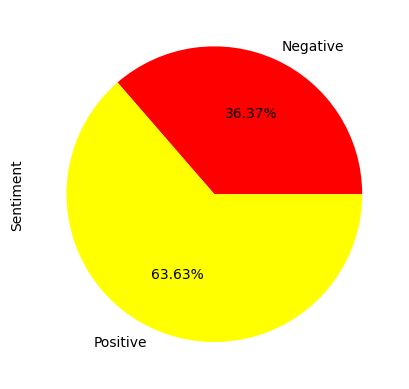

In [6]:
#To visualize the Sentiment in the dataset
data.Sentiment.value_counts(normalize=True).sort_index().plot(kind='pie',labels=['Negative','Positive'],
    colors=['Red','Yellow'],
    autopct='%.2f%%')

In [7]:
a=data.Text.values[1]
a

'user: AAP MOVIE. 55% return for the FEA/GEED indicator just 15 trades for the year.  AWESOME.  '

In [10]:
tokenize=word_tokenize(a)
tokenize

['user',
 ':',
 'AAP',
 'MOVIE',
 '.',
 '55',
 '%',
 'return',
 'for',
 'the',
 'FEA/GEED',
 'indicator',
 'just',
 '15',
 'trades',
 'for',
 'the',
 'year',
 '.',
 'AWESOME',
 '.']

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
english_stop = nltk.corpus.stopwords.words('english')
','.join(english_stop)

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [17]:
#Create a function for remove the stopwords
def remove_words(text):
    return [word for word in text if word.lower() not in  english_stop]
#Apply the function to the one question
remove_words(tokenize)

['user',
 ':',
 'AAP',
 'MOVIE',
 '.',
 '55',
 '%',
 'return',
 'FEA/GEED',
 'indicator',
 '15',
 'trades',
 'year',
 '.',
 'AWESOME',
 '.']

In [18]:
#Stemming process
stemmer = SnowballStemmer("english")
def stemming(text):
    return [stemmer.stem(word) for word in text]
stemming(tokenize)

['user',
 ':',
 'aap',
 'movi',
 '.',
 '55',
 '%',
 'return',
 'for',
 'the',
 'fea/ge',
 'indic',
 'just',
 '15',
 'trade',
 'for',
 'the',
 'year',
 '.',
 'awesom',
 '.']

In [20]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [21]:
#Lemmatization process with sample question
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatization(text):
    return [lemmatizer.lemmatize(word) for word in text]
lemmatization(tokenize)

['user',
 ':',
 'AAP',
 'MOVIE',
 '.',
 '55',
 '%',
 'return',
 'for',
 'the',
 'FEA/GEED',
 'indicator',
 'just',
 '15',
 'trade',
 'for',
 'the',
 'year',
 '.',
 'AWESOME',
 '.']

In [23]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [24]:
#Part of speech
tagged = nltk.pos_tag(tokenize)
tagged

[('user', 'NN'),
 (':', ':'),
 ('AAP', 'NNP'),
 ('MOVIE', 'NNP'),
 ('.', '.'),
 ('55', 'CD'),
 ('%', 'NN'),
 ('return', 'NN'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('FEA/GEED', 'NNP'),
 ('indicator', 'NN'),
 ('just', 'RB'),
 ('15', 'CD'),
 ('trades', 'NNS'),
 ('for', 'IN'),
 ('the', 'DT'),
 ('year', 'NN'),
 ('.', '.'),
 ('AWESOME', 'NNP'),
 ('.', '.')]

In [25]:
import re
#ALL text_preprocesing at one place
def preprocessing(text):
    #Word_tokenize
    words="".join([word for word in text if word not in string.punctuation])
    words=re.sub('[^a-zA-Z]', ' ',text)
    words=word_tokenize(text)
    #Stop words removeble
    words=[word for word in words if word not in english_stop]
    #Stemming process
    words=[stemmer.stem(word) for word in words]
    #Lmmmatization
    words=[lemmatizer.lemmatize(word) for word in words]
    # Convert all words to lowercase
    words = [word.lower() for word in words]
    words=''.join(words)
    return words
#apply the function to the text columns
data['Text']=data['Text'].apply(preprocessing)
data.head()

,Text,Sentiment
0,kickerwatchlistxidetitsoqpnkcpwbpzajtrademetho...,1
1,user:aapmovi.55%returnfea/geindic15tradeyear.a...,1
2,useri'dafraidshortamzn-looklikenear-monopolieb...,1
3,mntaover12.00,1
4,oiover21.37,1


In [26]:
#Divided the data into two variable
X=data['Text']
y=data['Sentiment']

In [27]:
#Create a function tokenization for add in TfidfVectorizer
def tokenize(text):
    return [stemmer.stem(word) for word in word_tokenize(text)]
vector=TfidfVectorizer(tokenizer=tokenize,stop_words=english_stop,ngram_range=(1,2),max_features=1000)
vector

TfidfVectorizer(max_features=1000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x789de3e868c0>)

In [28]:
vector.fit(X)
X=vector.transform(X)

In [29]:
X.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.33125746,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [30]:
#split the data into train and test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=120)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix
def modelbulid(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    model_pred=model.predict(X_test)
    print(f'The {model} accuracy score is {accuracy_score(y_test,model_pred)*100:.2f}')
    print('Classification_report',classification_report(y_test,model_pred))
    confusion=confusion_matrix(y_test,model_pred)
    sns.heatmap(confusion,annot=True,xticklabels=['Negative','Positive'],
    yticklabels=['Negative','Positive'],cmap='jet')

The LogisticRegression() accuracy score is 64.44
Classification_report               precision    recall  f1-score   support

          -1       0.52      0.15      0.24       627
           1       0.66      0.92      0.77      1111

    accuracy                           0.64      1738
   macro avg       0.59      0.54      0.50      1738
weighted avg       0.61      0.64      0.58      1738



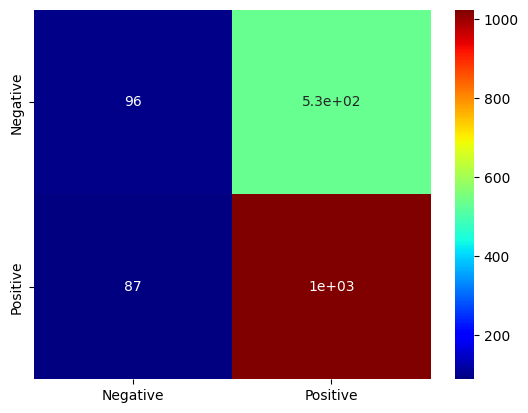

In [32]:
#Logisticmodel
logistic=LogisticRegression()
modelbulid(logistic,X_train,X_test,y_train,y_test)

The DecisionTreeClassifier() accuracy score is 63.46
Classification_report               precision    recall  f1-score   support

          -1       0.49      0.21      0.30       627
           1       0.66      0.87      0.75      1111

    accuracy                           0.63      1738
   macro avg       0.57      0.54      0.52      1738
weighted avg       0.60      0.63      0.59      1738



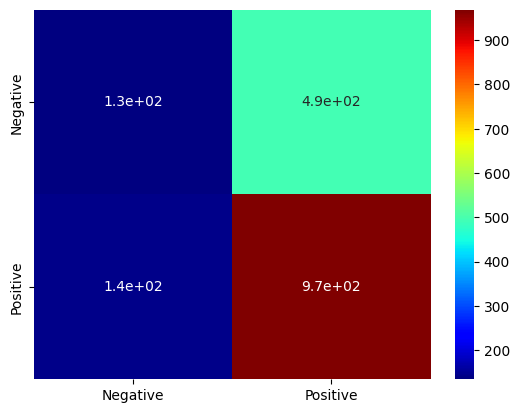

In [33]:
#DecisionTreeClassifier
tree=DecisionTreeClassifier()
modelbulid(tree,X_train,X_test,y_train,y_test)

The RandomForestClassifier() accuracy score is 65.02
Classification_report               precision    recall  f1-score   support

          -1       0.54      0.19      0.28       627
           1       0.67      0.91      0.77      1111

    accuracy                           0.65      1738
   macro avg       0.60      0.55      0.52      1738
weighted avg       0.62      0.65      0.59      1738



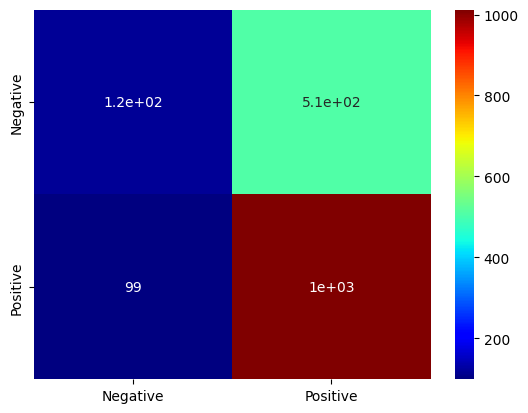

In [34]:
random=RandomForestClassifier()
modelbulid(random,X_train,X_test,y_train,y_test)

The KNeighborsClassifier() accuracy score is 61.85
Classification_report               precision    recall  f1-score   support

          -1       0.46      0.30      0.36       627
           1       0.67      0.80      0.73      1111

    accuracy                           0.62      1738
   macro avg       0.56      0.55      0.55      1738
weighted avg       0.59      0.62      0.60      1738



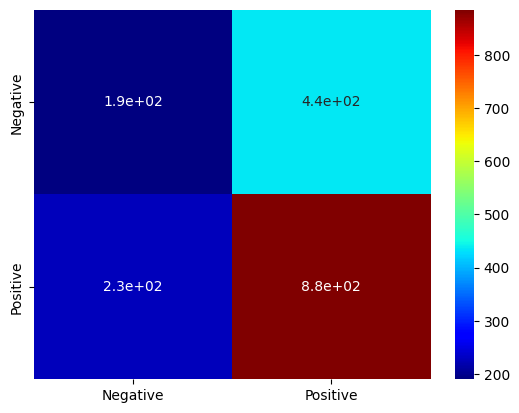

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
modelbulid(knn,X_train,X_test,y_train,y_test)